In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from pulsars import Pulsars, c, e_charge, e_mass, h
import speiser_fun_cyl as sfc


In [2]:
k = 500.
name = 'crab'
pulsar = Pulsars(k)[name]

gamma1 = 1.
B_0 = pulsar['Blc']
omegaB = (e_charge*B_0/(e_mass*c))    #γυροσυχνότητα
Rlc = pulsar['rlc']*omegaB/c
Delta = pulsar['rlc']/k*omegaB/c
q = 1.

# gamma0 = np.array([1000., 1.])   #αρχικός παράγοντας Lorentz
# init_pos = np.array([0.5])

gamma0 = np.array([10., 1000., 10000., 1.])
init_pos = np.array([0.125, 0.5, 0.75, 1.])

delta = 50.    #πάχος του φύλλου ρεύματος, αδιάστατο, σε μονάδες [c/ωΒ]

T = 100
N = 10**5
t = np.linspace(0.0, T*Delta, N)

pop = gamma0**(-1)


<IPython.core.display.Javascript object>


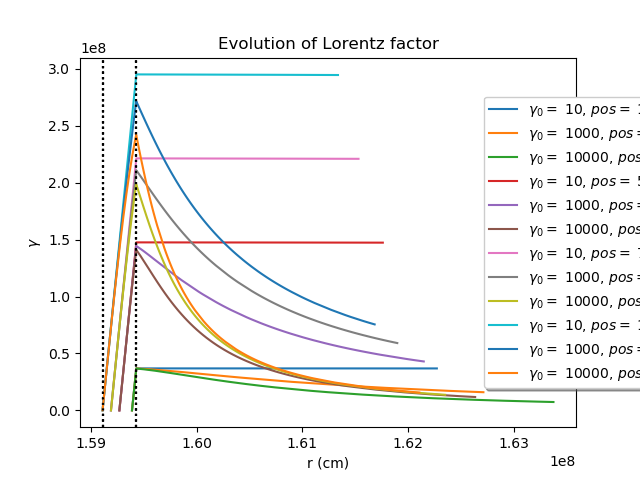

<IPython.core.display.Javascript object>


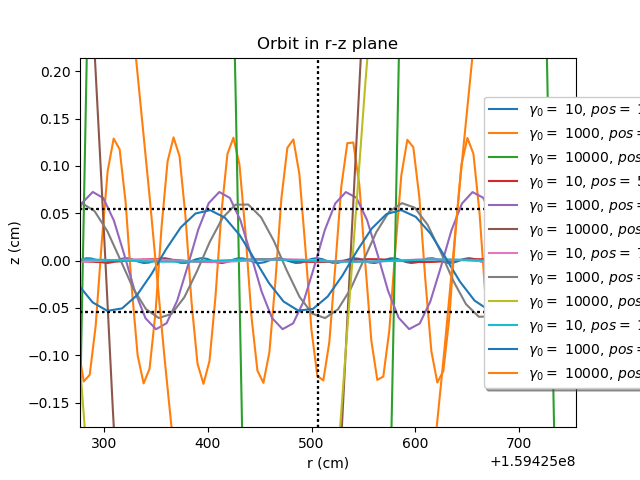

<IPython.core.display.Javascript object>


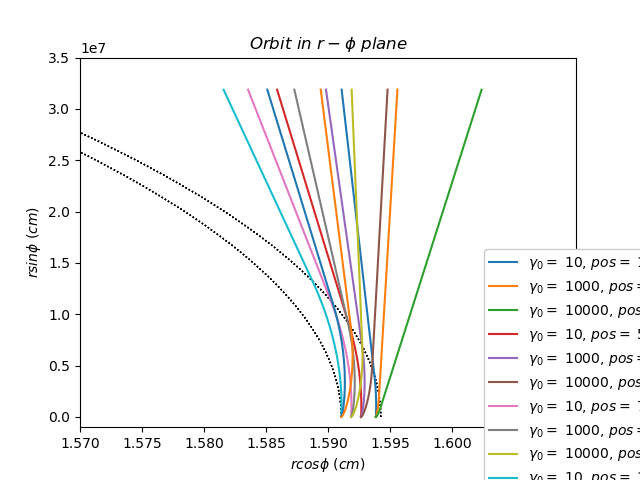

In [4]:
%matplotlib notebook




fig1, ax1 = plt.subplots()
for w in range(len(init_pos)):
    vec = np.load('cyl_{}_pos.npz'.format(int(100*init_pos[w])))
    r, ur, phi, uphi, z_cyl, uz_cyl = vec['r'], vec['ur'], vec['phi'], vec['uphi'], vec['z_cyl'], vec['uz_cyl']
    for i in range(0, len(gamma0)-1):
        if not (w == 7):
            ax1.plot(r[i]*c/omegaB, sfc.gamma(ur[i], uphi[i], uz_cyl[i]), 
                     label = '$\gamma_0 =$ {}, $pos =$ {}'.format(int(gamma0[i]), int(100*init_pos[w])))
#         ax1.plot(r1[i]*c/omegaB, sf.gamma(ur1[i], uphi1[i], uz_cyl1[i]), label = '$\gamma_0$ = {} $no loss$'.format(int(gamma0[i])))
    #     ax1.plot(r2[i]*c/omegaB, sf.gamma(ur2[i], uphi2[i], uz_cyl2[i]), label = '$\gamma_0$ = {} $explicit loss$'.format(int(gamma0[i])))

    ax1.set(xlabel = 'r (cm)', ylabel = '$\gamma$', title = 'Evolution of Lorentz factor')
    ax1.axvline(x = Rlc*c/omegaB, linestyle = ':', color = 'k')
    ax1.axvline(x = (Rlc - Delta)*c/omegaB, linestyle = ':', color = 'k')
    ax1.legend(loc='center left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(0.8, 0.5))
    #     fig1.savefig('γ(r)')

fig2, ax2 = plt.subplots()    
for w in range(len(init_pos)):
    vec = np.load('cyl_{}_pos.npz'.format(int(100*init_pos[w])))
    r, ur, phi, uphi, z_cyl, uz_cyl = vec['r'], vec['ur'], vec['phi'], vec['uphi'], vec['z_cyl'], vec['uz_cyl']    
    for i in range(0, len(gamma0)-1):
        if not (w == 7):
            ax2.plot(r[i]*c/omegaB, z_cyl[i]*c/omegaB, 
                     label = '$\gamma_0 =$ {}, $pos =$ {}'.format(int(gamma0[i]), int(100*init_pos[w])))


    ax2.axhline(y = delta*c/omegaB, linestyle = ':', color = 'k')
    ax2.axhline(y = -delta*c/omegaB, linestyle = ':', color = 'k')
    ax2.axvline(x = Rlc*c/omegaB, linestyle = ':', color = 'k')
    ax2.axvline(x = (Rlc - Delta)*c/omegaB, linestyle = ':', color = 'k')
    ax2.set(xlabel = 'r (cm)', ylabel = 'z (cm)', title = 'Orbit in r-z plane')
#            xlim = [1.5926E+8, 1.5927E+8], ylim = [-0.06, 0.06])
    ax2.legend(loc='center left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(0.8, 0.5))
#     fig2.savefig('epipedo_r-z')

fig3, ax3 = plt.subplots()
for w in range(len(init_pos)):
    vec = np.load('cyl_{}_pos.npz'.format(int(100*init_pos[w])))
    r, ur, phi, uphi, z_cyl, uz_cyl = vec['r'], vec['ur'], vec['phi'], vec['uphi'], vec['z_cyl'], vec['uz_cyl']
    for i in range(0, len(gamma0) - 1):
        if not (w == 7):
            plot1 = ax3.plot(r[i]*np.cos(phi[i])*c/omegaB, r[i]*np.sin(phi[i])*c/omegaB, 
                             label = '$\gamma_0 =$ {}, $pos =$ {}'.format(int(gamma0[i]), int(100*init_pos[w])))
# #     plot1 = ax3.plot(r1[i]*np.cos(phi1[i])*c/omegaB, r1[i]*np.sin(phi1[i])*c/omegaB, 
# #                      label = '$\gamma_0$ = {}'.format(int(gamma0[i])))
# #     plot1 = ax3.plot(r2[i]*np.cos(phi2[i])*c/omegaB, r2[i]*np.sin(phi2[i])*c/omegaB, 
# #                      label = '$\gamma_0$ = {}'.format(int(gamma0[i])))

    ax3.set(xlabel = '$rcos\phi \ (cm)$', ylabel = '$rsin\phi \ (cm)$', title = '$Orbit \ in \ r-\phi \ plane$', aspect = 'auto', 
           xlim = [1.57E+8, 1.61E+8], ylim = [-0.1E+7, 3.5E+7])


    ax3.legend(loc='best', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(0.8, 0.5))

    radius1 = mpatches.Arc((0.0, 0.0), 2*Rlc*c/omegaB, 2*Rlc*c/omegaB, theta1 = 0, theta2 = 90, color = 'k', ls = ':',
                           linewidth=1, fill=False)
    radius2 = mpatches.Arc((0.0, 0.0), 2*(Rlc - Delta)*c/omegaB, 2*(Rlc - Delta)*c/omegaB, theta1 = 0, theta2 = 90,
                           color = 'k', ls = ':', linewidth=1, fill=False)
    ax3.add_patch(radius1)
    ax3.add_patch(radius2)
    
# fig5, ax5 = plt.subplots()
# for w in range(len(init_pos)):
#     vec = np.load('cyl_{}.npz'.format(int(100*init_pos[w])))
#     r, ur, phi, uphi, z_cyl, uz_cyl = vec['r'], vec['ur'], vec['phi'], vec['uphi'], vec['z_cyl'], vec['uz_cyl']
#     for i in range(0, len(gamma0) - 1):
#         ax5.plot(t, uphi[i]*sfc.Bz_cyl(r[i], Rlc, Delta)/(uz_cyl[i]*sfc.B_phi(r[i], z_cyl[i], Rlc, Delta, delta)))

# fig3.savefig('epipedo_rcosφ-rsinφ')

plt.show()

<IPython.core.display.Javascript object>


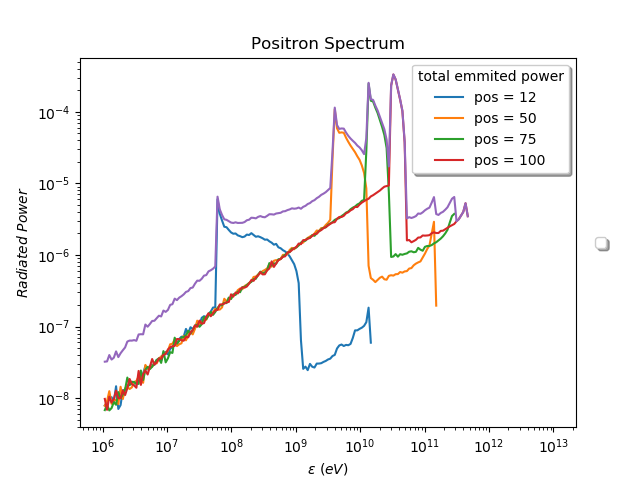

No handles with labels found to put in legend.


In [11]:

total = np.zeros(201)
lines = []
labels = []





fig4, ax4 = plt.subplots()
for w in range(len(init_pos)):
    
    if not (w == 7):
        spec = np.load('spectrum_{}_pos.npz'.format(int(100*init_pos[w])))
        (en, ph_num, ph_num_out, ph_en, ph_en_out, ph_num_tot, ph_en_tot) = (spec['en'], spec['ph_num'], spec['ph_num_out'], 
                                                                             spec['ph_en'], spec['ph_en_out'], 
                                                                             spec['ph_num_tot'], spec['ph_en_tot'])
    
    colors = iter(plt.cm.Spectral(np.linspace(0, 1, len(gamma0))))
#     col = next(colors)
#     for i in range(len(gamma0)-1):
#         if not (w == 7):
#             col = next(colors)
#             ax4.scatter(en, ph_en[i], s = 10, c = col,
#                         label = '$\gamma_0 =$ {}, $pos =$ {}'.format(int(gamma0[i]), int(100*init_pos[w])))
#             ax4.scatter(en, ph_en_out[i], marker = '*', s = 10, c = col,
#                         label = '$\gamma_0 =$ {}, $pos =$ {}, $out$'.format(int(gamma0[i]), int(100*init_pos[w])))
                        
            
    if w != 7:
        line, = ax4.plot(en, ph_en_tot)
        lines.append(line)
        label = 'pos = {}'.format(int(100*init_pos[w]))
        labels.append(label)
        total += ph_en_tot
    #     ax4.scatter(en_rlc, ph_en_rlc[i], label = '$\gamma_0$ = {}, rlc'.format(int(gamma0[i])))
    ax4.set(xlabel = '$ \epsilon \ (eV)$', ylabel = '$Radiated \ Power$', title = 'Positron Spectrum')
    ax4.set_xscale(value = 'log', nonposx = 'mask')
    ax4.set_yscale(value = 'log', nonposy = 'mask')
ax4.plot(en, total)   

# ax4.plot(en_rlc, ph_en_tot_rlc, label = 'total photon energy, rlc', color = 'g')
leg1 = ax4.legend(handles = [lines[w] for w in range(len(init_pos))], 
                  labels = [labels[w] for w in range(len(init_pos))],
                  title = 'total emmited power',
                  loc = 'best', ncol = 1, fancybox=True, shadow=True )

leg2 = ax4.legend(loc='center', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.05, 0.5) )
marker1,  = ax4.plot([], [], marker = 'o', color = 'k', markersize = 10)
marker2,  = ax4.plot([], [], marker = '*', color = 'k', markersize = 10)
# leg3 = ax4.legend([marker1, marker2], ['inside', 'outside'], loc = 'best')
ax4.add_artist(leg1)
# ax4.add_artist(leg2)


#     fig4.savefig('test_spectrum')
plt.show()


In [30]:
parameters = {'pulsar':name, 'char magn field (Blc)':B_0, 'Radius of lc':Rlc, 'multiplicity':k, 'diss zone length':Delta,'diss zone width':delta, 
              'charge sign':q, 'runtime':T*Delta, 'number of t points':N, 'initial lorentz factors':gamma0, 
              'initial injection positions':init_pos}
print(parameters)

with open('parameters.txt', 'w') as par_file:
    for key, val in parameters.items():
        par_file.write('{} --> {}\n'.format(key, val))
    

{'pulsar': 'crab', 'char magn field (Blc)': 1578372.7530606163, 'Radius of lc': 147627742479.3923, 'multiplicity': 500.0, 'diss zone length': 295255484.9587846, 'diss zone width': 50.0, 'charge sign': 1.0, 'runtime': 29525548495.878456, 'number of t points': 100000, 'initial lorentz factors': array([1.e+01, 1.e+03, 1.e+04, 1.e+00]), 'initial injection positions': array([0.125, 0.5  , 0.75 , 1.   ])}


In [12]:
color = plt.get_cmap('plasma')
color(0,1,10)

(12, 7, 134, 255)

In [54]:
gamma0[:-1]

array([   10.,  1000., 10000.])